In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("diabetic_data.csv")

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.shape

(101766, 50)

In [5]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

- `encounter_id` and `patient_nbr` are ids and dont have any predictive power

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

- Lets look at max_glu_serum and A1Cresult.
- max_glu_serum is maximum glucose serum test result during the hospital encounter.
- A1Cresult is the most recent hemoglobin A1C test result during the encounter (A1C is a measure of average blood sugar over the past 2–3 months).
- The presence or absence of a test (i.e., "None") may itself be predictive.

In [7]:
df['max_glu_serum'].value_counts()

,count
max_glu_serum,
Norm,2597
>200,1485
>300,1264


In [8]:
df['A1Cresult'].value_counts()

,count
A1Cresult,
>8,8216
Norm,4990
>7,3812


In [9]:
# Fill actual missing values (NaN) with 'No Information'
df['max_glu_serum'] = df['max_glu_serum'].fillna('No Information')
df['A1Cresult'] = df['A1Cresult'].fillna('No Information')

In [ ]:
df['readmitted'].value_counts()

,count
readmitted,
NO,54864
>30,35545
<30,11357


- Dataset is imbalanced, with a 10:90 ratio between the minority and majority classes. To ensure that both classes are appropriately represented in our train-test splits, it is important to use stratified sampling in the modeling process

In [10]:
df['race'].value_counts()

,count
race,
Caucasian,76099
AfricanAmerican,19210
?,2273
Hispanic,2037
Other,1506
Asian,641


- Approximately 2.2% of the values are missing or marked as “?” in the dataset.

- Since this proportion is relatively low, it is better to treat “?” as a separate category labeled “Unknown” rather than dropping those rows.

- Additionally, race may be an important predictor in clinical datasets and should be retained for analysis.

In [11]:
df['race'] = df['race'].replace('?', 'Unknown')

In [12]:
df['gender'].value_counts()

,count
gender,
Female,54708
Male,47055
Unknown/Invalid,3


In [13]:
# Display the 3 rows where gender is 'Unknown/Invalid'
unknown_gender_rows = df[df['gender'] == 'Unknown/Invalid']
unknown_gender_rows

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
30506,98634858,100695042,Other,Unknown/Invalid,[70-80),?,3,1,1,1,...,No,No,No,No,No,No,No,Ch,Yes,NO
75551,226864668,60524946,Unknown,Unknown/Invalid,[60-70),?,1,1,7,1,...,No,No,No,No,No,No,No,No,No,NO
82573,257364294,78119847,Unknown,Unknown/Invalid,[70-80),?,1,22,7,8,...,No,No,No,No,No,No,No,Ch,Yes,NO


- Only 3 entries are "Unknown/Invalid" out of ~100,000+
- Let's drop these 3 rows (since it’s such a tiny fraction and belong to Major class, it won’t affect your data)

In [14]:
# Drop rows where gender is 'Unknown/Invalid'
df = df[df['gender'] != 'Unknown/Invalid']

In [15]:
df['age'].value_counts()

,count
age,
[70-80),26066
[60-70),22482
[50-60),17256
[80-90),17197
[40-50),9685
[30-40),3775
[90-100),2793
[20-30),1657
[10-20),691


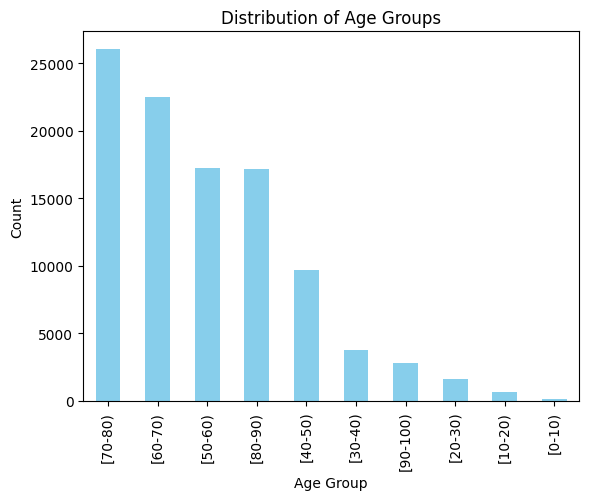

In [16]:
import matplotlib.pyplot as plt
df['age'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups')
plt.show()

In [17]:
df['weight'].value_counts()

,count
weight,
?,98566
[75-100),1336
[50-75),897
[100-125),625
[125-150),145
[25-50),97
[0-25),48
[150-175),35
[175-200),11


- Over 98% of the data is missing for weight.

- Only a tiny fraction have any recorded weight, and it's binned, not continuous

- Let's drop the column. It is overwhelmingly missing and will not provide useful signal to your model. Including it may introduce noise or bias.

In [18]:
# Drop the 'weight' column
df = df.drop(columns=['weight'])

- While going through csv I can see some ? in some columns. Lets analyse their value counts

In [19]:
df['payer_code'].value_counts().head()

,count
payer_code,
?,40255
MC,32439
HM,6274
SP,5007
BC,4655


- This column represents the primary payment source
- About 40% of the data is missing for payer_code
- Let's Treat '?' as a separate category (e.g., "Unknown").

In [20]:
df['medical_specialty'].value_counts().head()

,count
medical_specialty,
?,49947
InternalMedicine,14635
Emergency/Trauma,7565
Family/GeneralPractice,7440
Cardiology,5351


- About 50% of the data is missing for medical_specialty.

- This column represents the medical specialty of the admitting physician.

In [21]:
df['diag_1'].value_counts().get('?', 0)

np.int64(21)

In [22]:
df['diag_2'].value_counts().get('?', 0)

np.int64(358)

In [23]:
df['diag_3'].value_counts().get('?', 0)

np.int64(1423)

- Codes like 250.83, 250.01, V27, 403, 414, 427, 486, etc. are all valid ICD-9-CM diagnosis codes.

- The variables diag_1, diag_2, and diag_3 represent the primary, secondary, and tertiary diagnoses for each patient, following ICD-9-CM conventions for coding multiple conditions per encounter.

- For missing diagnosis codes, let's impute the missing values or treat them as a separate “Unknown” category, rather than removing the data, to preserve as much information as possible for analysis

#### Reference Websites
- https://www.rapidclaims.ai/blogs/icd-9-codes-overview-diagnosis-procedure
- https://www.cdc.gov/nchs/data/icd/icd9cm_guidelines_2011.pdf
- https://www.findacode.com/icd-9/icd9-diagnosis-codes-V6-group.html

In [24]:
df['diag_1'].value_counts()

,count
diag_1,
428,6862
414,6580
786,4016
410,3614
486,3508
...,...
833,1
391,1
690,1


In [25]:
def icd9_group(code):
    if pd.isnull(code) or code == '?':
        return 'Unknown'
    code_str = str(code)
    if code_str.startswith('V'):
        return 'Supplementary'
    try:
        prefix = int(float(code_str.split('.')[0]))
    except ValueError:
        return 'Unknown'
    if 1 <= prefix <= 139:
        return 'Infectious'
    elif 140 <= prefix <= 239:
        return 'Neoplasms'
    elif 240 <= prefix <= 279:
        return 'Endocrine'
    elif 280 <= prefix <= 289:
        return 'Blood'
    elif 290 <= prefix <= 319:
        return 'Mental'
    elif 320 <= prefix <= 389:
        return 'Nervous'
    elif 390 <= prefix <= 459:
        return 'Circulatory'
    elif 460 <= prefix <= 519:
        return 'Respiratory'
    elif 520 <= prefix <= 579:
        return 'Digestive'
    elif 580 <= prefix <= 629:
        return 'Genitourinary'
    elif 630 <= prefix <= 679:
        return 'Pregnancy'
    elif 680 <= prefix <= 709:
        return 'Skin'
    elif 710 <= prefix <= 739:
        return 'Musculoskeletal'
    elif 740 <= prefix <= 759:
        return 'Congenital'
    elif 780 <= prefix <= 799:
        return 'Symptoms'
    elif 800 <= prefix <= 999:
        return 'Injury'
    else:
        return 'Other'

for col in ['diag_1', 'diag_2', 'diag_3']:
    df[col + '_group'] = df[col].apply(icd9_group)

In [26]:
df['diag_1_group'].value_counts()

,count
diag_1_group,
Circulatory,30335
Endocrine,11459
Respiratory,10407
Digestive,9208
Symptoms,7636
Injury,6972
Genitourinary,5078
Musculoskeletal,4957
Neoplasms,3433


- Clinical relevance: Diagnosis codes are often among the strongest predictors of readmission risk. They capture the patient’s primary and secondary health issues during the hospital stay.

In [27]:
# Now that we have their categorical columns we can drop these
df = df.drop(columns=['diag_1', 'diag_2', 'diag_3'])

In [29]:
# List of columns to handle
cols_with_question = ['race', 'payer_code', 'medical_specialty']

# Replace '?' with 'Unknown' in the specified columns
for col in cols_with_question:
    df[col] = df[col].replace('?', 'Unknown')

In [ ]:
import pandas as pd

# Numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
print("Missing values in numeric columns:")
print(df[numeric_cols].isnull().sum())

# Categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("\nMissing values in categorical columns:")
print(df[categorical_cols].isnull().sum())

Missing values in numeric columns:
encounter_id                0
patient_nbr                 0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
dtype: int64

Missing values in categorical columns:
race                        0
gender                      0
age                         0
payer_code                  0
medical_specialty           0
diag_1                      0
diag_2                      0
diag_3                      0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide   

In [30]:
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(df[col].value_counts())
    print("\n")

race
Caucasian          76099
AfricanAmerican    19210
Unknown             2271
Hispanic            2037
Other               1505
Asian                641
Name: count, dtype: int64


gender
Female    54708
Male      47055
Name: count, dtype: int64


age
[70-80)     26066
[60-70)     22482
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64


payer_code
Unknown    40255
MC         32439
HM          6274
SP          5007
BC          4655
MD          3532
CP          2531
UN          2448
CM          1937
OG          1033
PO           592
DM           549
CH           146
WC           135
OT            95
MP            79
SI            55
FR             1
Name: count, dtype: int64


medical_specialty
Unknown                   49947
InternalMedicine          14635
Emergency/Trauma           7565
Family/GeneralPractice     7440
Cardiology                 5351
               

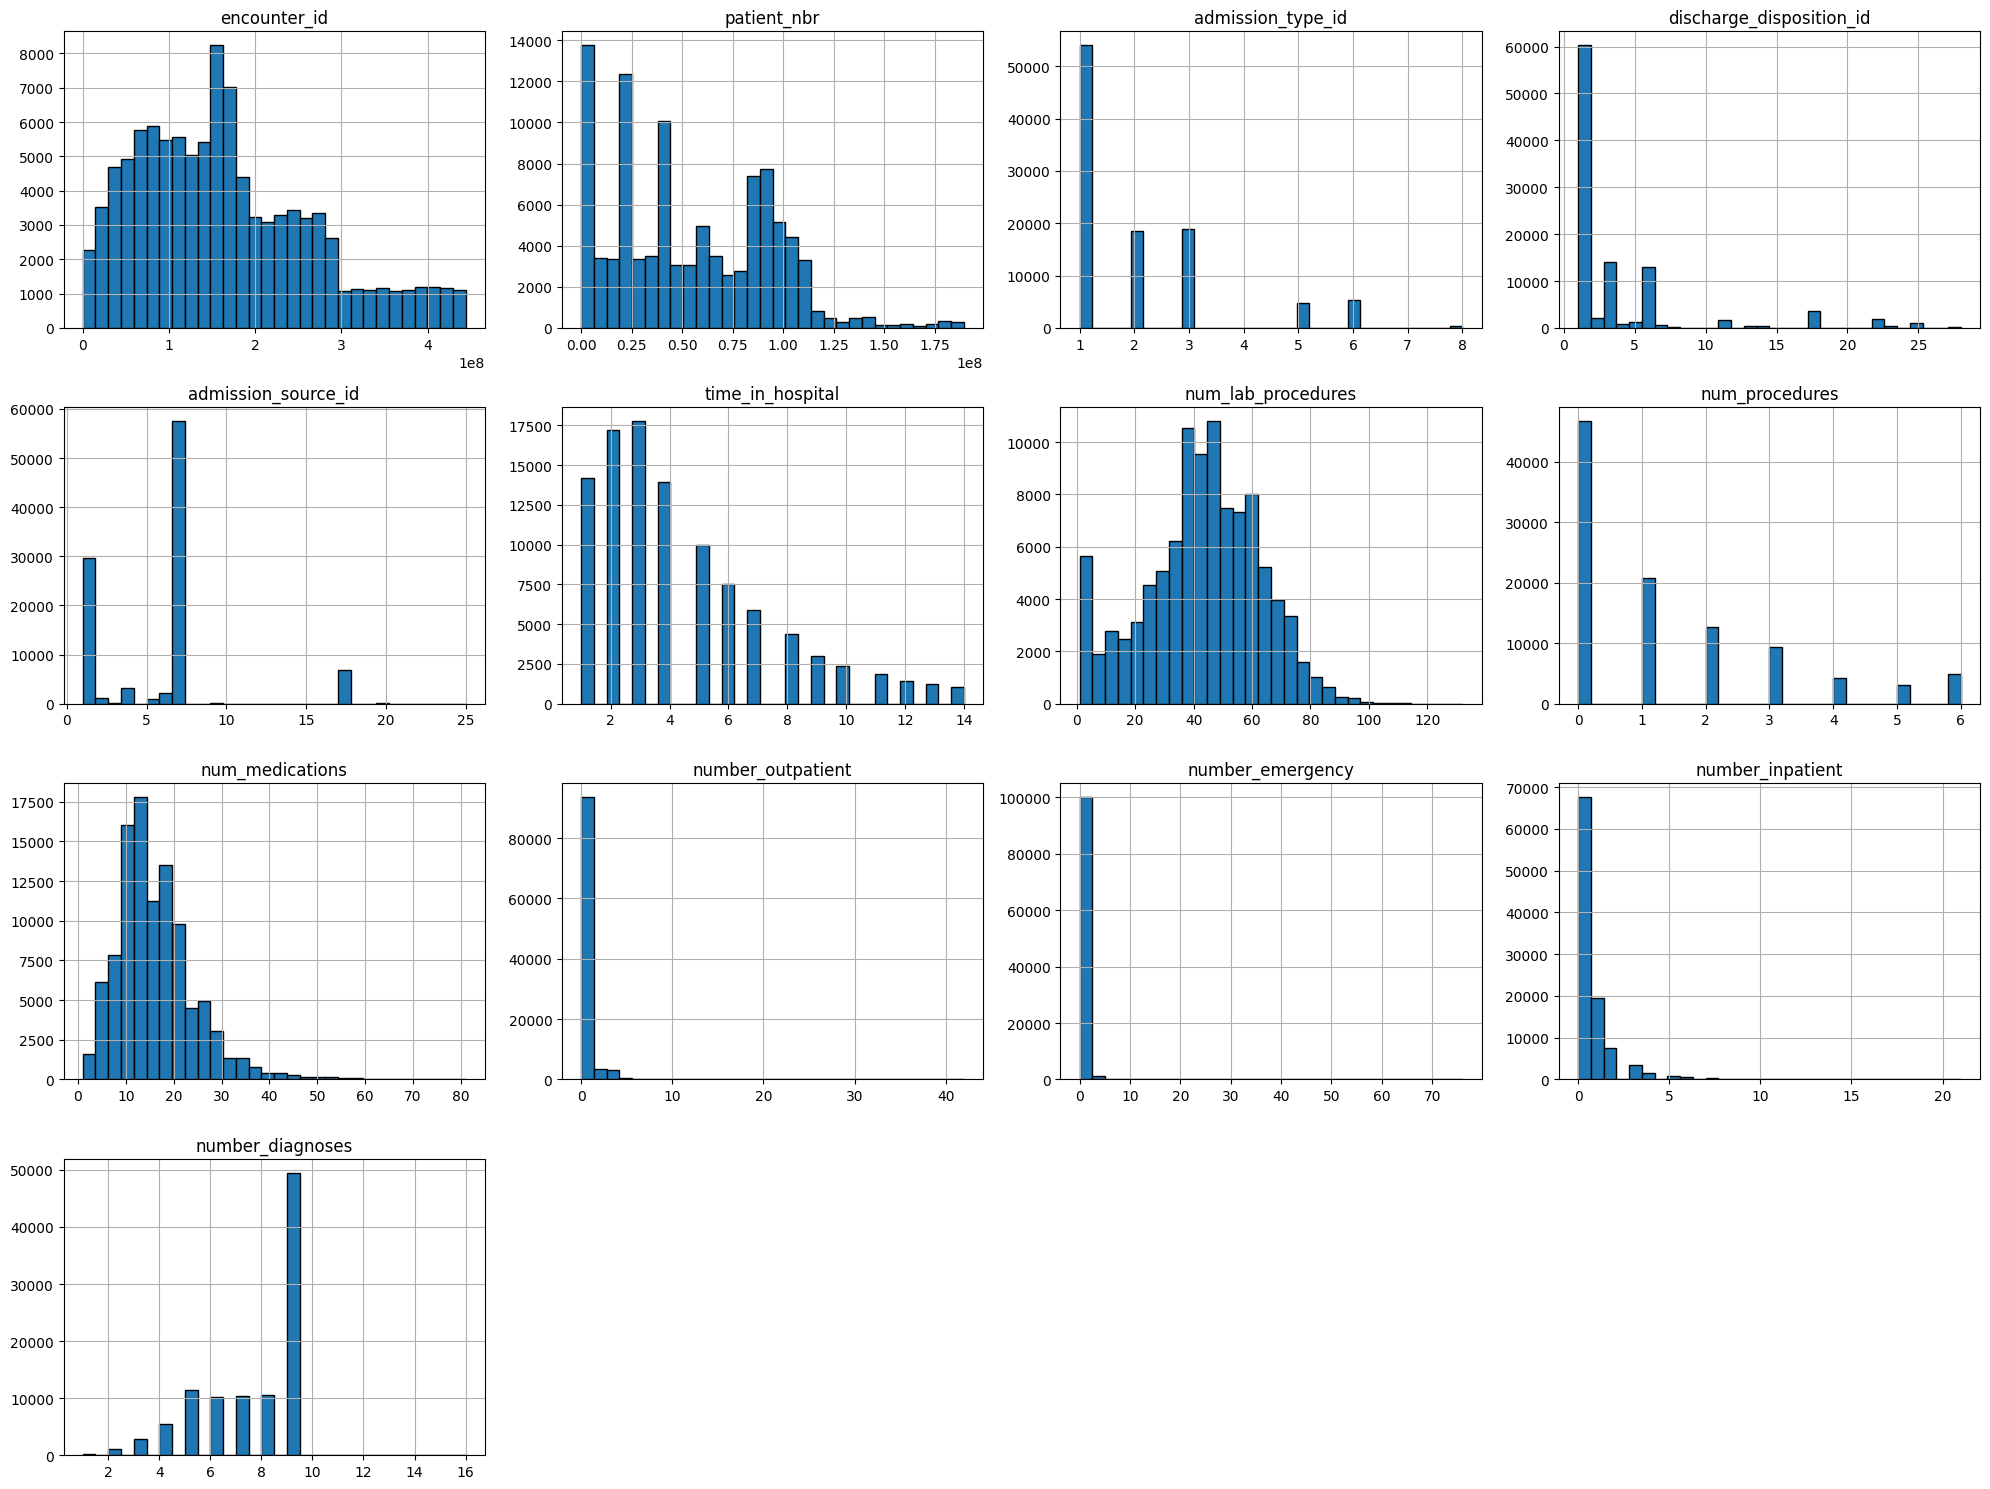

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
df.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

- We can see that all categorical values are handled and we have handled the missing values as well. Now in the histogram we can see that some columns have one-sided data distribution
- Now lets look for outliers

In [31]:
cols = [
    'num_lab_procedures',
    'num_medications',
    'number_outpatient',
    'number_emergency',
    'number_inpatient',
    'number_diagnoses'
]

for col in cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts().sort_index())
    print('-' * 40)


Value counts for num_lab_procedures:
num_lab_procedures
1      3208
2      1101
3       668
4       378
5       285
       ... 
120       1
121       1
126       1
129       1
132       1
Name: count, Length: 118, dtype: int64
----------------------------------------
Value counts for num_medications:
num_medications
1      262
2      470
3      900
4     1417
5     2017
      ... 
72       3
74       1
75       2
79       1
81       1
Name: count, Length: 75, dtype: int64
----------------------------------------
Value counts for number_outpatient:
number_outpatient
0     85024
1      8547
2      3594
3      2042
4      1099
5       533
6       303
7       155
8        98
9        83
10       57
11       42
12       30
13       31
14       28
15       20
16       15
17        8
18        5
19        3
20        7
21        7
22        5
23        2
24        3
25        2
26        2
27        3
28        1
29        2
33        2
34        1
35        2
36        2
37        1
38      

- These were the extremely distributed columns seen from the histograms.
- The values doesnt seem impractical. So we don't need to handle them

### Encoding

- I chose one-hot encoding to transform categorical variables into a numerical format that machine learning models, including XGBoost, can interpret effectively.
- One-hot encoding creates separate binary columns for each category, ensuring that the model does not assume any false order or hierarchy among categories—an issue that can occur with label encoding

In [32]:
# List of columns to one-hot encode
one_hot_cols = [
    'gender', 'race',
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
    'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
    'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
    'tolazamide', 'examide', 'citoglipton', 'insulin',
    'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone',
    'metformin-pioglitazone', 'change', 'diabetesMed'
]

df_encoded = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [33]:
df_encoded.columns

Index(['encounter_id', 'patient_nbr', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'readmitted', 'diag_1_group',
       'diag_2_group', 'diag_3_group', 'gender_Male', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Other', 'race_Unknown',
       'metformin_No', 'metformin_Steady', 'metformin_Up', 'repaglinide_No',
       'repaglinide_Steady', 'repaglinide_Up', 'nateglinide_No',
       'nateglinide_Steady', 'nateglinide_Up', 'chlorpropamide_No',
       'chlorpropamide_Steady', 'chlorpropamide_Up', 'glimepiride_No',
       'glimepiride_Steady', 'glimepiride_Up', 'acetohexamide_Steady',
       'glipizide_No', 'glipizide_Steady', 'glipizide_Up', 'glyburide_No',
       'glyburide_Steady',

In [34]:
df_encoded.shape

(101763, 78)

#### Encoding disease groups

- I chose ordinal encoding for the diag_1_group, diag_2_group, and diag_3_group columns because these features represent grouped diagnosis codes that have a meaningful, structured order

In [35]:
from sklearn.preprocessing import OrdinalEncoder

# List of columns to encode
ordinal_cols = ['diag_1_group', 'diag_2_group', 'diag_3_group']

# Apply ordinal encoding
encoder = OrdinalEncoder()
df_encoded[ordinal_cols] = encoder.fit_transform(df[ordinal_cols])

In [36]:
# To see the mapping
for col, categories in zip(ordinal_cols, encoder.categories_):
    print(f"{col}: {dict(zip(categories, range(len(categories))))}")

diag_1_group: {'Blood': 0, 'Circulatory': 1, 'Congenital': 2, 'Digestive': 3, 'Endocrine': 4, 'Genitourinary': 5, 'Infectious': 6, 'Injury': 7, 'Mental': 8, 'Musculoskeletal': 9, 'Neoplasms': 10, 'Nervous': 11, 'Pregnancy': 12, 'Respiratory': 13, 'Skin': 14, 'Supplementary': 15, 'Symptoms': 16, 'Unknown': 17}
diag_2_group: {'Blood': 0, 'Circulatory': 1, 'Congenital': 2, 'Digestive': 3, 'Endocrine': 4, 'Genitourinary': 5, 'Infectious': 6, 'Injury': 7, 'Mental': 8, 'Musculoskeletal': 9, 'Neoplasms': 10, 'Nervous': 11, 'Pregnancy': 12, 'Respiratory': 13, 'Skin': 14, 'Supplementary': 15, 'Symptoms': 16, 'Unknown': 17}
diag_3_group: {'Blood': 0, 'Circulatory': 1, 'Congenital': 2, 'Digestive': 3, 'Endocrine': 4, 'Genitourinary': 5, 'Infectious': 6, 'Injury': 7, 'Mental': 8, 'Musculoskeletal': 9, 'Neoplasms': 10, 'Nervous': 11, 'Pregnancy': 12, 'Respiratory': 13, 'Skin': 14, 'Supplementary': 15, 'Symptoms': 16, 'Unknown': 17}


#### Encoding Age

In [37]:
age_order = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
             '[60-70)', '[70-80)', '[80-90)', '[90-100)']

df_encoded['age_ord'] = df_encoded['age'].map({age: idx for idx, age in enumerate(age_order)})

In [38]:
glu_order = {'No Information': 0, 'Norm': 1, '>200': 2, '>300': 3}
a1c_order = {'No Information': 0, 'Norm': 1, '>7': 2, '>8': 3}

df_encoded['max_glu_serum_ord'] = df_encoded['max_glu_serum'].map(glu_order)
df_encoded['A1Cresult_ord'] = df_encoded['A1Cresult'].map(a1c_order)

- Frequency Encoding is recommended for high-cardinality categorical columns.

In [39]:
df_encoded['payer_code_freq'] = df_encoded['payer_code'].map(df_encoded['payer_code'].value_counts(normalize=True))
df_encoded['medical_specialty_freq'] = df_encoded['medical_specialty'].map(df_encoded['medical_specialty'].value_counts(normalize=True))

In [40]:
df_encoded.shape

(101763, 83)

In [41]:
df_encoded.columns

Index(['encounter_id', 'patient_nbr', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'readmitted', 'diag_1_group',
       'diag_2_group', 'diag_3_group', 'gender_Male', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Other', 'race_Unknown',
       'metformin_No', 'metformin_Steady', 'metformin_Up', 'repaglinide_No',
       'repaglinide_Steady', 'repaglinide_Up', 'nateglinide_No',
       'nateglinide_Steady', 'nateglinide_Up', 'chlorpropamide_No',
       'chlorpropamide_Steady', 'chlorpropamide_Up', 'glimepiride_No',
       'glimepiride_Steady', 'glimepiride_Up', 'acetohexamide_Steady',
       'glipizide_No', 'glipizide_Steady', 'glipizide_Up', 'glyburide_No',
       'glyburide_Steady',